<a href="https://colab.research.google.com/github/nabxxmift23/churn-rate-class/blob/main/Klasifikasi_Decision_Tree_untuk_Churn_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load data
df = pd.read_csv('/content/acak.csv', sep=';')

# menampilkan data
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,No
1,0,0,0,0,34,1,0,1,0,1,0,0,0,1,1,3,56.95,1889.50,No
2,0,0,0,0,2,1,0,1,1,0,0,0,0,0,1,3,53.85,108.15,yes
3,0,0,0,0,45,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,No
4,1,0,0,0,2,1,0,0,0,0,0,0,0,0,1,2,70.70,151.65,yes


In [ ]:
# melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            443 non-null    int64  
 1   SeniorCitizen     443 non-null    int64  
 2   Partner           443 non-null    int64  
 3   Dependents        443 non-null    int64  
 4   tenure            443 non-null    int64  
 5   PhoneService      443 non-null    int64  
 6   MultipleLines     443 non-null    int64  
 7   OnlineSecurity    443 non-null    int64  
 8   OnlineBackup      443 non-null    int64  
 9   DeviceProtection  443 non-null    int64  
 10  TechSupport       443 non-null    int64  
 11  StreamingTV       443 non-null    int64  
 12  StreamingMovies   443 non-null    int64  
 13  Contract          443 non-null    int64  
 14  PaperlessBilling  443 non-null    int64  
 15  PaymentMethod     443 non-null    int64  
 16  MonthlyCharges    443 non-null    float64
 1

In [ ]:
df=df.drop('tenure',axis=1)

##Statistika Deskriptif Data

In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,0.534989,0.148984,0.487585,0.322799,0.889391,0.406321,0.291196,0.401806,0.338600,0.297968,0.410835,0.379233,0.663657,0.652370,1.480813,66.742212,2319.693228
std,0.499338,0.356475,0.500411,0.468075,0.314003,0.491701,0.454827,0.490817,0.473769,0.457883,0.492542,0.485745,0.827804,0.476756,1.068457,29.206757,2236.101509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.700000,19.300000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.375000,473.700000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,73.350000,1495.100000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,90.625000,3741.275000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,114.600000,8129.300000


###Mengganti Nilai No dan Yes menjadi 0 dan 1

In [ ]:
df = df.replace('No', 0)

In [ ]:
df = df.replace('yes', 1)

##Membagi variabel x dan y

In [ ]:
design_matrix = df.drop("Churn", axis = 1)
response_y = df["Churn"]

In [ ]:
design_matrix

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,3,56.95,1889.50
2,0,0,0,0,1,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0,0,1,1,1,1,1,0,1,1,1,1,1,1,3,84.80,1990.50
439,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90
440,1,0,1,1,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45
441,0,1,1,0,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [ ]:
response_y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

##Melakukan split data test dan data train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(design_matrix, response_y, test_size = 0.2, random_state = 110)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 17)
(354,)
(89, 17)
(89,)


##Melakukan klasifikasi dengan ML decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Membuat objek DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Definisikan daftar nilai yang mungkin untuk setiap hyperparameter
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Misalnya, None berarti tanpa batasan kedalaman
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# Melakukan pencarian kombinasi terbaik
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
best_params = grid_search.best_params_
print("Hyperparameter terbaik:", best_params)

# Membuat model Decision Tree dengan hyperparameter terbaik
best_dt_model = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'])

# Melatih model dengan data pelatihan
clf=best_dt_model.fit(X_train, y_train)

# Melakukan prediksi dengan model terbaik
y_pred = best_dt_model.predict(X_test)


Hyperparameter terbaik: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}


###Hasil Akurasi Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))


Akurasi: 0.8202247191011236
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        65
           1       0.75      0.50      0.60        24

    accuracy                           0.82        89
   macro avg       0.79      0.72      0.74        89
weighted avg       0.81      0.82      0.81        89



##Visualisasi Decision Tree

In [ ]:
pip install graphviz
pip install pydotplus

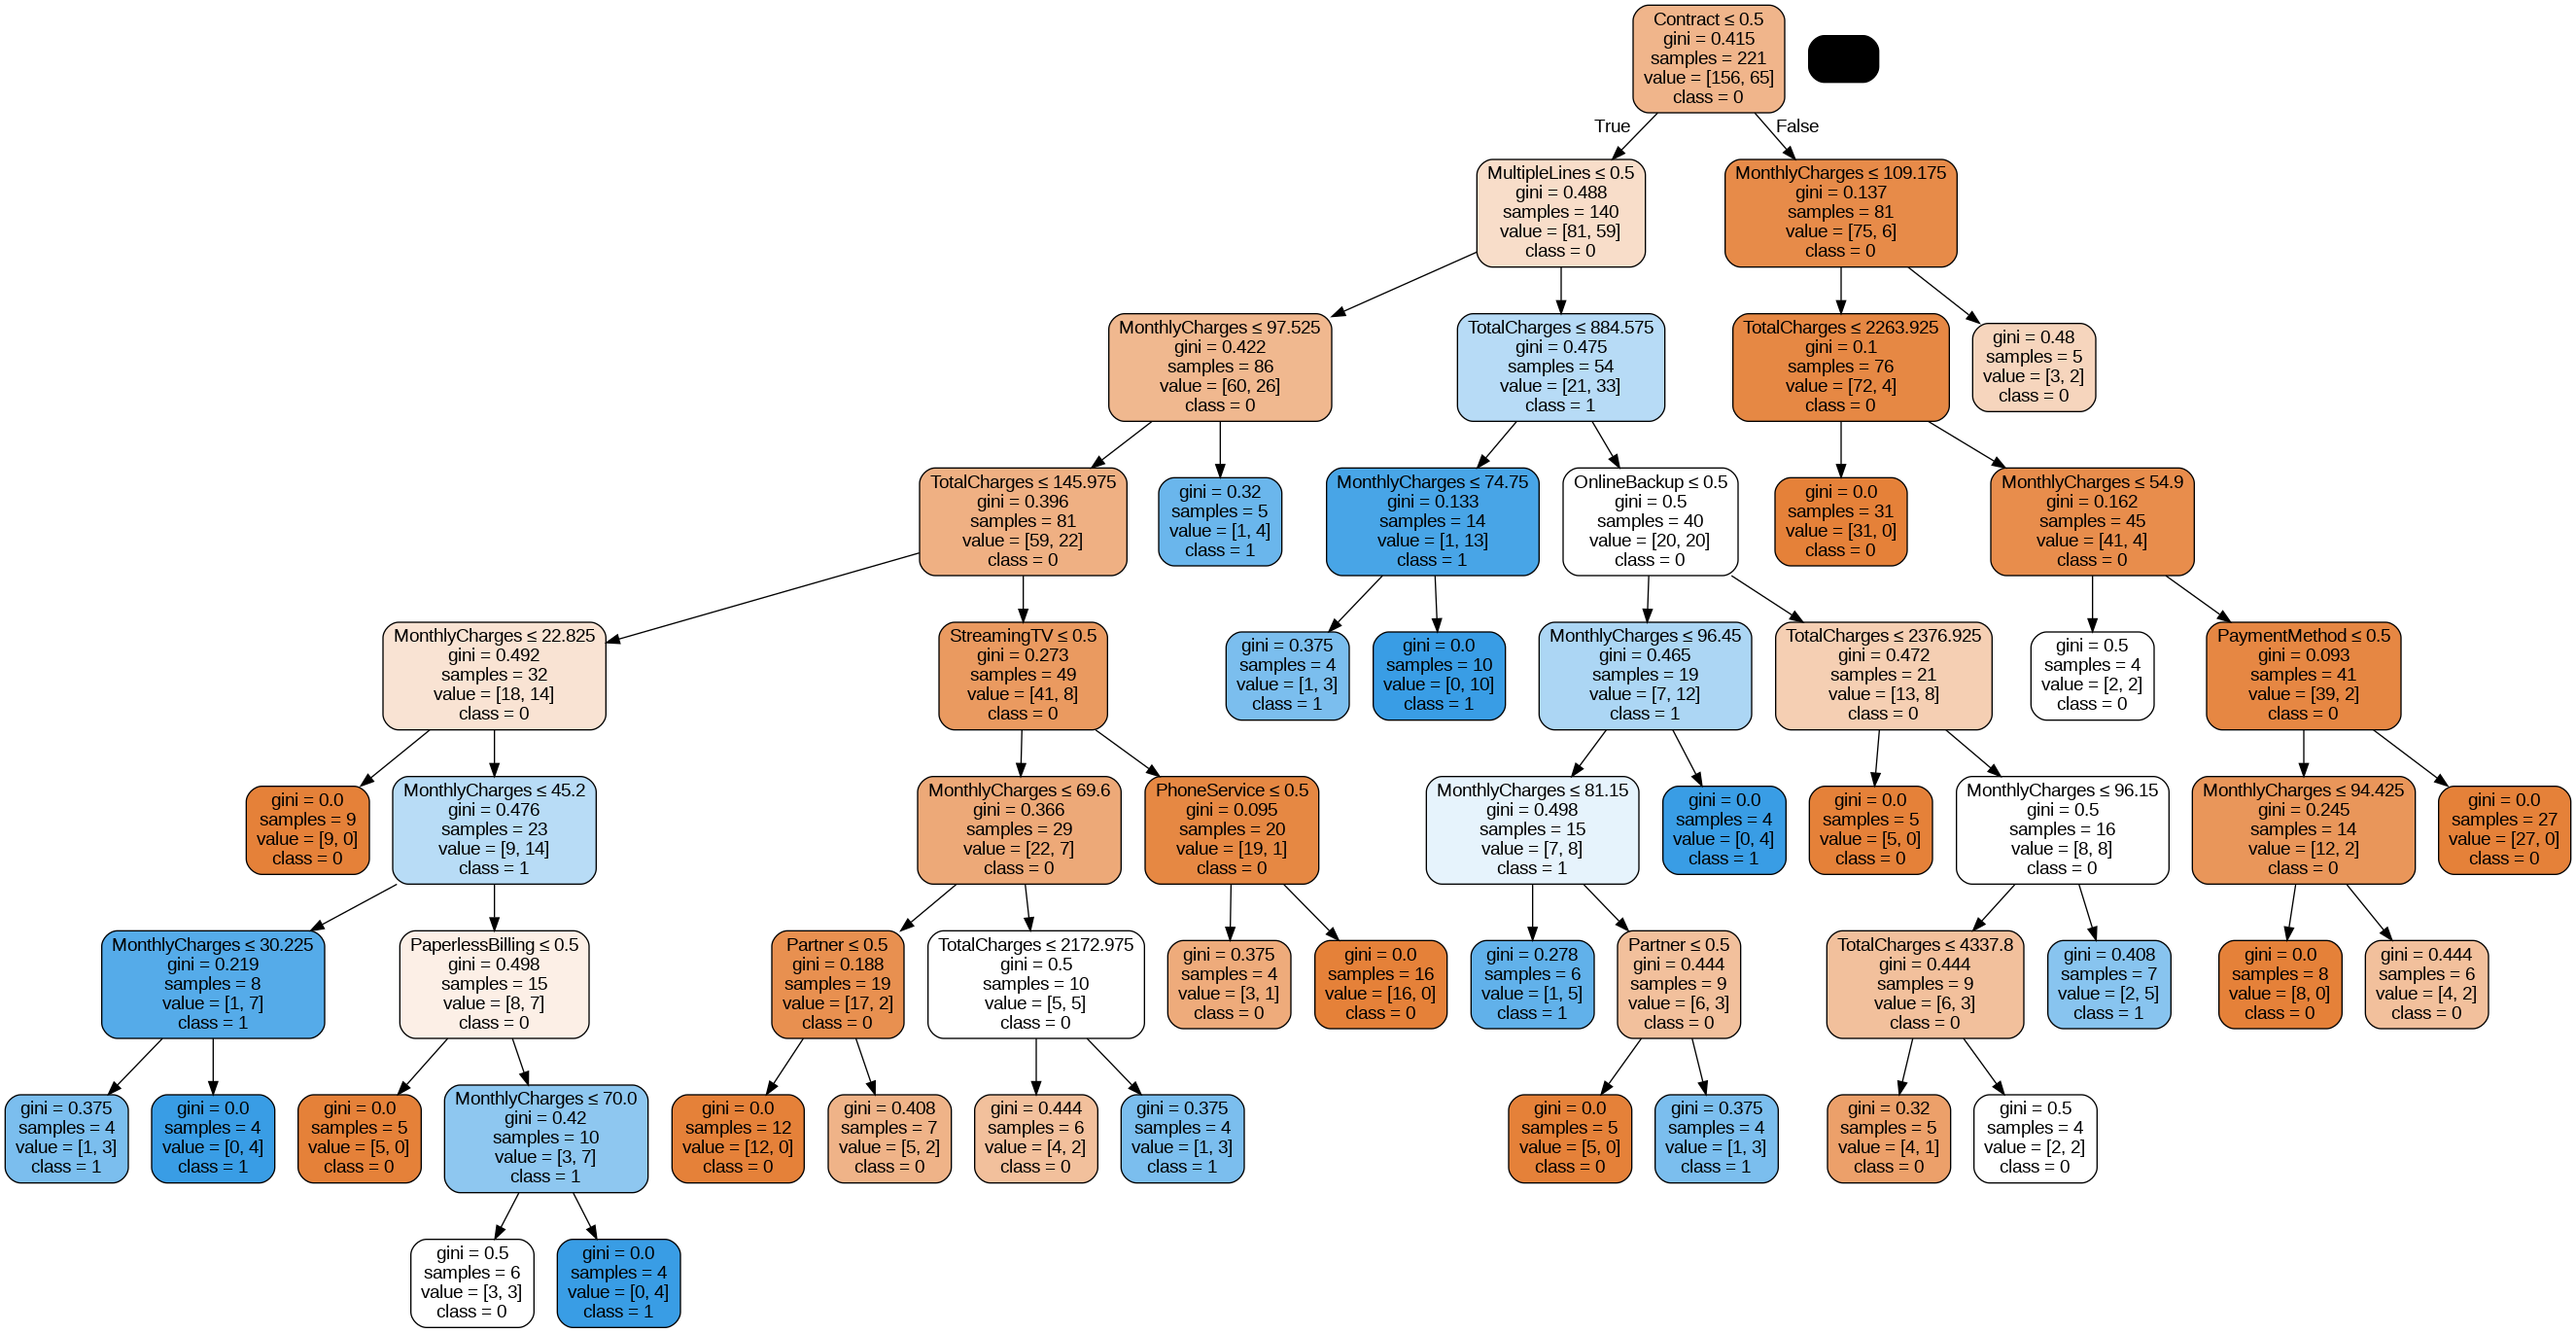

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('churn.png')
Image(graph.create_png())

##Confusion Matrix

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

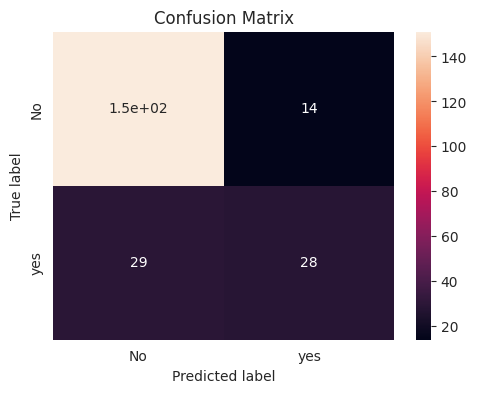

In [ ]:
#CONFUSION MATRIX
labels = ['No','yes']
cm = confusion_matrix(y_test , y_pred)
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = labels,
                     columns = labels)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()